In [3]:
import numpy as np
import scipy as sp
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%reload_ext autoreload
%autoreload 2
import itertools
import sys
sys.path.append('/home/roquero/CausalAggregation/Code')
from generateEnvironment import GenerateEnvironment
from solveProblem import SolveProblem
import matplotlib as mpl
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
np.set_printoptions(suppress=True)
np.set_printoptions(precision=5)

In [4]:
connectivity_e0 = np.array([
    [0,0,0,0,0,0,0,0], # H / 0
    [0,0,0,0,0,0,0,0], # I / 1
    [2,0,0,0,-1,0,0,0], # X_1 / 2
    [1,0,1,0,0,0,0,0], # X_2 / 3
    [0,0,0,2,0,0,0,0], # X_3 / 4
    [0,0,1,0,1,0,0,0], # X_4 / 5
    [1,0,0,1,0,2,0,0], # Y / 6
    [0,0,0,1,0,2,-1,0], # X_5 / 7
])
x_indices=np.array([2,3,4,5,7])
y_index=6
n_samples=500
n_reps=1000

In [3]:
for n_samples in np.array([50,100,200,500,1000]):
    coverage=[]
    length=[]
    for _ in np.arange(n_reps):
        generate_environment = GenerateEnvironment(connectivity_e0,x_indices,y_index)
        dict_interventions = {2:{'type':'iv','iv_index':1}} 
        generate_environment.generate_intervention(n_samples, dict_interventions, 'e1')
        dict_interventions = {i:{'type':'independent'} for i in [4,7]}
        generate_environment.generate_intervention(n_samples, dict_interventions, 'e2')
        dict_interventions = {3:{'type':'independent','iv_index':1}, 5:{'type':'parental','parental_index':[2,4]}} 
        generate_environment.generate_intervention(n_samples, dict_interventions, 'e3')
        
        
        solver = SolveProblem(generate_environment)
        
        solver.compute_beta()
        solver.compute_asymptotic_cov()
        solver.compute_CI(0.05)
        for coord in np.arange(5):
            coverage.append((solver.CI[0,coord]<solver.generate_environment.beta[coord])&
                        (solver.CI[1,coord]>solver.generate_environment.beta[coord]))
            length.append(solver.CI[1,coord]-solver.CI[0,coord])
            
    print('For n_samples {}: Avg coverage: {} pm{}. Avg length: {} pm{}.'.format(n_samples,np.mean(coverage),2*np.std(coverage)/np.sqrt(n_reps),np.mean(length),2*np.std(length)/np.sqrt(n_reps))
         )

For n_samples 50: Avg coverage: 0.9734 pm0.010176922914122916. Avg length: 9.783229426628873 pm16.6779818078808.
For n_samples 100: Avg coverage: 0.978 pm0.009277068502495819. Avg length: 0.7472087234048876 pm0.033285251443223605.
For n_samples 200: Avg coverage: 0.9726 pm0.010324580378882231. Avg length: 0.4689266704084035 pm0.009820610035900226.
For n_samples 500: Avg coverage: 0.969 pm0.010961569230726047. Avg length: 0.28688977139735927 pm0.005040203755648114.
For n_samples 1000: Avg coverage: 0.97 pm0.010788883167408942. Avg length: 0.2009634431506126 pm0.003332588865920967.


/home/roquero/miniconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/roquero/miniconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


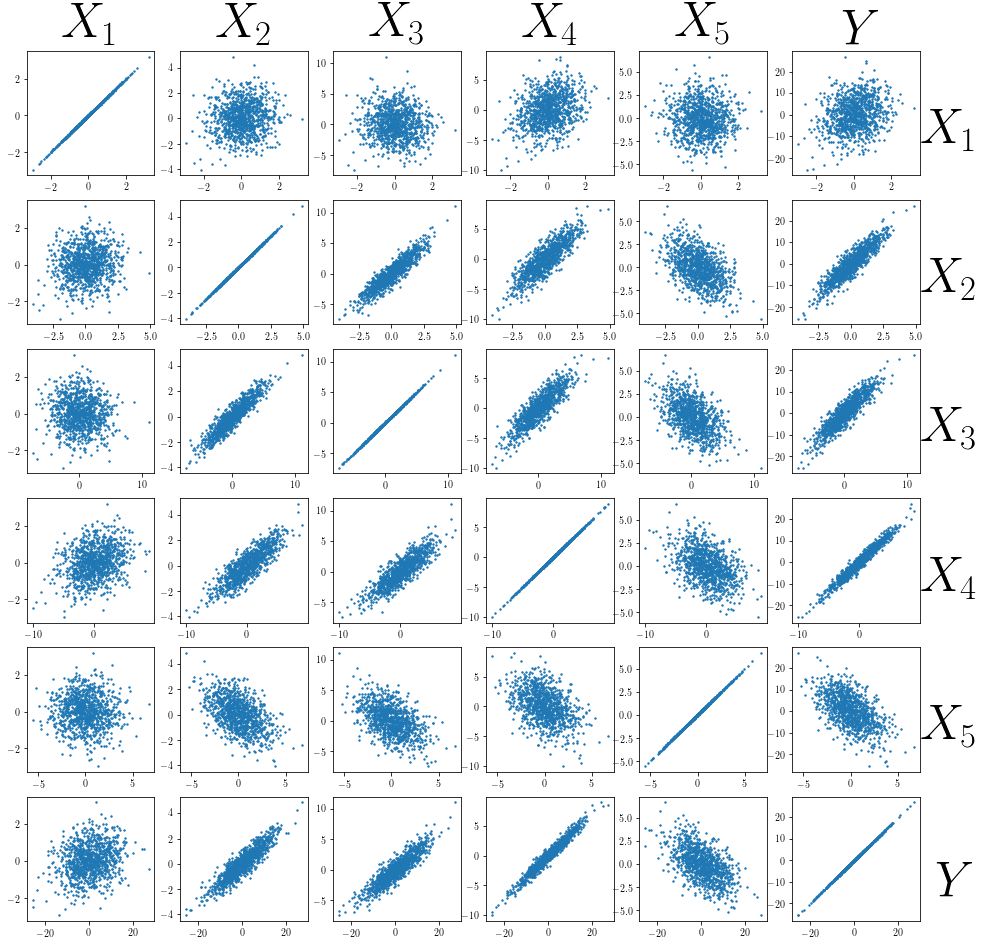

In [4]:
env_id='e1'
X=generate_environment.env_dataset[env_id][2:,:]
X[[-2,-1]]=X[[-1,-2]]
fig, ax = plt.subplots(nrows=6,ncols=6, figsize=(16,16))
for i,j in itertools.product(np.arange(6),repeat=2):
    _ = ax[i,j].scatter(X[i,:],X[j,:],s=2, rasterized=True)
for i in np.arange(5):
    _ = ax[0,i].set_title('$X_{}$'.format(i+1), fontsize=50)
    _ = ax[i,5].yaxis.set_label_position("right")
    _ = ax[i,5].set_ylabel('$X_{}$'.format(i+1), rotation=360, labelpad=30, fontsize=50)
_ = ax[0,5].set_title('$Y$', fontsize=50)
_ = ax[5,5].yaxis.set_label_position("right")
_ = ax[5,5].set_ylabel('$Y$', rotation=360, labelpad=30, fontsize=50)
_ = plt.savefig('scatter_{}.png'.format(env_id), format='png',bbox_inches='tight')

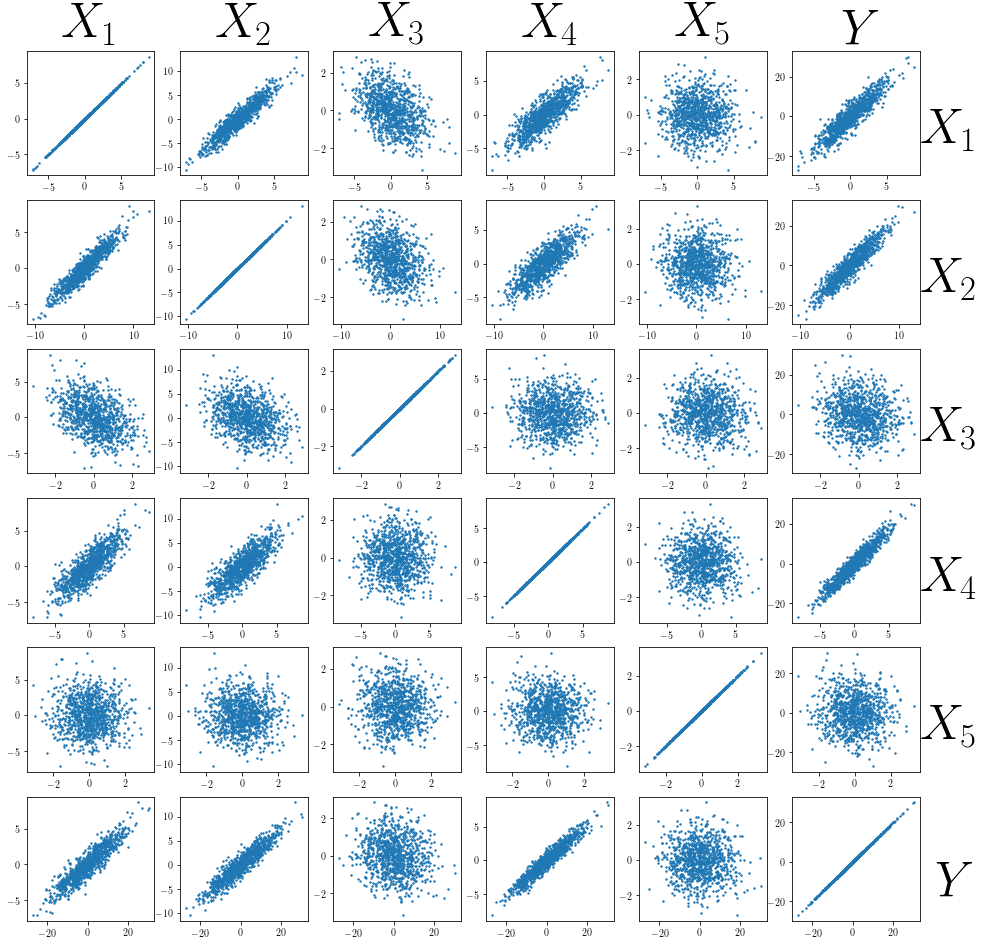

In [5]:
env_id='e2'
X=generate_environment.env_dataset[env_id][2:,:]
X[[-2,-1]]=X[[-1,-2]]
fig, ax = plt.subplots(nrows=6,ncols=6, figsize=(16,16))
for i,j in itertools.product(np.arange(6),repeat=2):
    _ = ax[i,j].scatter(X[i,:],X[j,:],s=2, rasterized=True)
for i in np.arange(5):
    _ = ax[0,i].set_title('$X_{}$'.format(i+1), fontsize=50)
    _ = ax[i,5].yaxis.set_label_position("right")
    _ = ax[i,5].set_ylabel('$X_{}$'.format(i+1), rotation=360, labelpad=30, fontsize=50)
_ = ax[0,5].set_title('$Y$', fontsize=50)
_ = ax[5,5].yaxis.set_label_position("right")
_ = ax[5,5].set_ylabel('$Y$', rotation=360, labelpad=30, fontsize=50)
_ = plt.savefig('scatter_{}.png'.format(env_id), format='png',bbox_inches='tight')

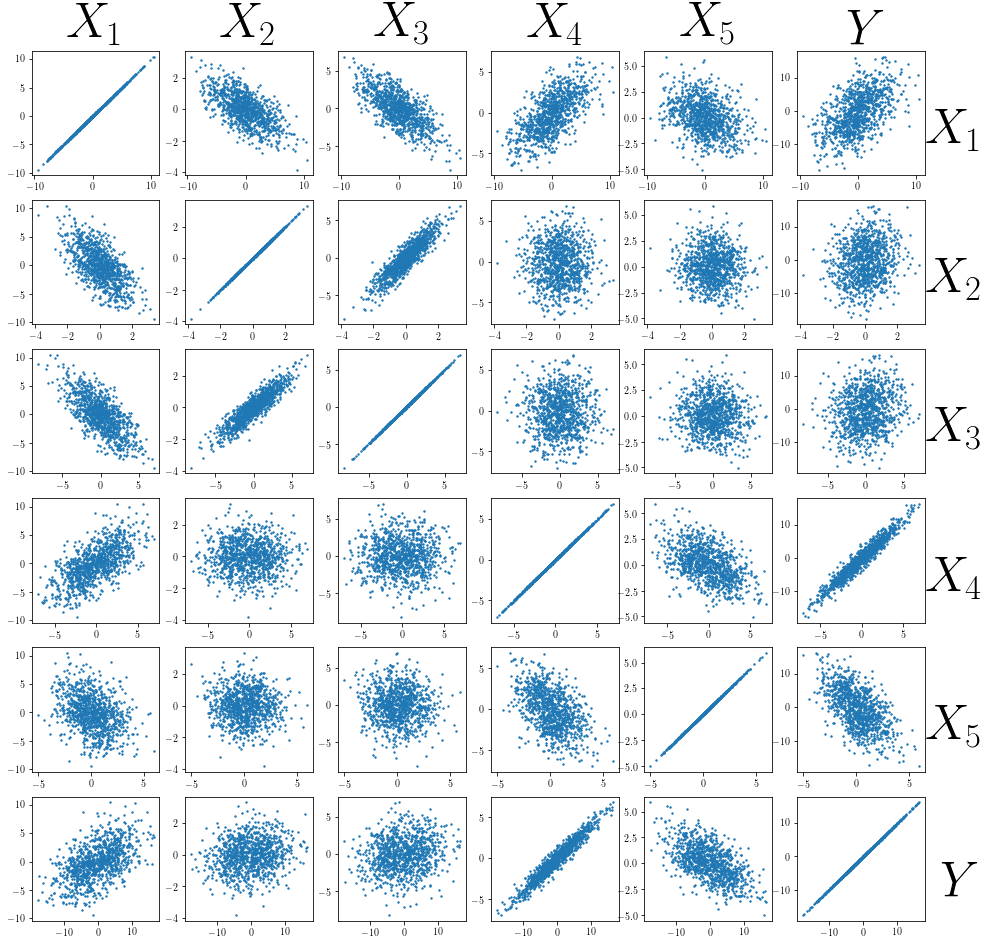

In [6]:
env_id='e3'
X=generate_environment.env_dataset[env_id][2:,:]
X[[-2,-1]]=X[[-1,-2]]
fig, ax = plt.subplots(nrows=6,ncols=6, figsize=(16,16))
for i,j in itertools.product(np.arange(6),repeat=2):
    _ = ax[i,j].scatter(X[i,:],X[j,:],s=2, rasterized=True)
for i in np.arange(5):
    _ = ax[0,i].set_title('$X_{}$'.format(i+1), fontsize=50)
    _ = ax[i,5].yaxis.set_label_position("right")
    _ = ax[i,5].set_ylabel('$X_{}$'.format(i+1), rotation=360, labelpad=30, fontsize=50)
_ = ax[0,5].set_title('$Y$', fontsize=50)
_ = ax[5,5].yaxis.set_label_position("right")
_ = ax[5,5].set_ylabel('$Y$', rotation=360, labelpad=30, fontsize=50)
_ = plt.savefig('scatter_{}.png'.format(env_id), format='png',bbox_inches='tight')

In [7]:
coverage=[]
length=[]
for _ in np.arange(n_reps):
    generate_environment = GenerateEnvironment(connectivity_e0,x_indices,y_index)
    dict_interventions = {i:{'type':'independent'} for i in [2,3,4,5,7]}
    #dict_interventions.update({2:{'type':'iv','iv_index':1}, 5:{'type':'parental','parental_index':[2,4]}})
    generate_environment.generate_intervention(n_samples, dict_interventions, 'e1')
    
    
    solver = SolveProblem(generate_environment)
    
    solver.compute_beta()
    solver.compute_asymptotic_cov()
    solver.compute_CI(0.05)
    coverage.append((solver.CI[0,coord]<solver.generate_environment.beta[coord])&
                    (solver.CI[1,coord]>solver.generate_environment.beta[coord]))
    length.append(solver.CI[1,coord]-solver.CI[0,coord])

In [8]:
np.mean(coverage)
2*np.std(coverage)/np.sqrt(n_reps)
np.mean(length)
2*np.std(length)/np.sqrt(n_reps)

0.952

0.01351976331153767

0.17587936034073778

0.0003519590486486396